In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor


In [362]:
#pip install catboost

In [363]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [364]:
df=pd.read_csv("cars_engage_2022.csv")
df

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,3_Point_Seat-Belt_in_Middle_Rear_Seat,Ambient_Lightning,Cargo/Boot_Lights,Drive_Modes,Engine_Immobilizer,High_Speed_Alert_System,Lane_Watch_Camera/_Side_Mirror_Camera,Passenger_Side_Seat-Belt_Reminder,Seat_Back_Pockets,Voice_Recognition,Walk_Away_Auto_Car_Lock,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Compression_Ratio,Adjustable_Steering_Column,Other_Specs,Other_specs,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Android_Auto,Apple_CarPlay,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever c...,Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,NaN,NaN,NaN,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,NaN,Yes,Not on offer,NaN,Yes,2

In [365]:
# checking the shape
df.shape

(1276, 141)

In [366]:
## preview of data

In [367]:
df.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,3_Point_Seat-Belt_in_Middle_Rear_Seat,Ambient_Lightning,Cargo/Boot_Lights,Drive_Modes,Engine_Immobilizer,High_Speed_Alert_System,Lane_Watch_Camera/_Side_Mirror_Camera,Passenger_Side_Seat-Belt_Reminder,Seat_Back_Pockets,Voice_Recognition,Walk_Away_Auto_Car_Lock,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Compression_Ratio,Adjustable_Steering_Column,Other_Specs,Other_specs,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Android_Auto,Apple_CarPlay,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever c...,Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,NaN,NaN,NaN,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,NaN,Yes,Not on offer,NaN,Yes,2

In [368]:
## drop the irrelevent the column
df.drop(columns=['Unnamed: 0'],inplace=True)

In [369]:
df.shape

(1276, 140)

## basic understanding of data

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 140 entries, Make to Electric_Range
dtypes: float64(6), object(134)
memory usage: 1.4+ MB


## Checking the columns type

In [371]:
df.dtypes

Make                                          object
Model                                         object
Variant                                       object
Ex-Showroom_Price                             object
Displacement                                  object
Cylinders                                    float64
Valves_Per_Cylinder                          float64
Drivetrain                                    object
Cylinder_Configuration                        object
Emission_Norm                                 object
Engine_Location                               object
Fuel_System                                   object
Fuel_Tank_Capacity                            object
Fuel_Type                                     object
Height                                        object
Length                                        object
Width                                         object
Body_Type                                     object
Doors                                        f

In [372]:
## fetching the column name     note: .....= elipses
df.columns

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration', 'Emission_Norm',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=140)

## checking missing values

In [373]:
df.isnull().sum()

Make                                           75
Model                                           0
Variant                                         0
Ex-Showroom_Price                               0
Displacement                                   12
Cylinders                                      66
Valves_Per_Cylinder                           102
Drivetrain                                      7
Cylinder_Configuration                         13
Emission_Norm                                  11
Engine_Location                                43
Fuel_System                                     8
Fuel_Tank_Capacity                             69
Fuel_Type                                       0
Height                                          1
Length                                          0
Width                                          12
Body_Type                                       6
Doors                                           4
City_Mileage                                  555


In [374]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i,"........",df[i].isnull().sum()*100/df.shape[0])

Make ........ 5.877742946708464
Displacement ........ 0.9404388714733543
Cylinders ........ 5.172413793103448
Valves_Per_Cylinder ........ 7.993730407523511
Drivetrain ........ 0.54858934169279
Cylinder_Configuration ........ 1.0188087774294672
Emission_Norm ........ 0.8620689655172413
Engine_Location ........ 3.3699059561128526
Fuel_System ........ 0.6269592476489029
Fuel_Tank_Capacity ........ 5.407523510971787
Height ........ 0.07836990595611286
Width ........ 0.9404388714733543
Body_Type ........ 0.4702194357366771
Doors ........ 0.31347962382445144
City_Mileage ........ 43.495297805642636
Highway_Mileage ........ 62.69592476489028
ARAI_Certified_Mileage ........ 8.934169278996865
ARAI_Certified_Mileage_for_CNG ........ 97.88401253918495
Kerb_Weight ........ 28.605015673981192
Gears ........ 8.22884012539185
Ground_Clearance ........ 22.648902821316614
Front_Brakes ........ 1.9592476489028212
Rear_Brakes ........ 1.9592476489028212
Front_Suspension ........ 4.623824451410658
Rear_S

In [375]:
## delete the columns having missing values % is >70
for i in df.columns:
    if df[i].isnull().sum()*100/df.shape[0]>70:
        df.drop(columns=[i],inplace=True)

In [376]:
df.shape 

(1276, 115)

## seggrgate numeric and object data type columns so that we can work accordingly


In [377]:
numeric=['int32','float64']
df_numeric=df.select_dtypes(include=numeric)

In [378]:
df_numeric

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags
0,2.0,2.0,5.0,4.0,NaN
1,2.0,2.0,5.0,4.0,NaN
2,2.0,2.0,4.0,4.0,NaN
3,2.0,2.0,5.0,4.0,NaN
4,2.0,2.0,5.0,4.0,NaN
...,...,...,...,...,...
1271,4.0,4.0,4.0,5.0,2.0
1272,4.0,4.0,4.0,5.0,6.0
1273,4.0,4.0,4.0,5.0,6.0
1274,4.0,4.0,4.0,5.0,2.0


In [379]:
df_numeric.isnull().sum()

Cylinders               66
Valves_Per_Cylinder    102
Doors                    4
Seating_Capacity         6
Number_of_Airbags      135
dtype: int64

In [380]:
for i in df_numeric:
    if df_numeric[i].isnull().sum()>0:
        df_numeric[i]=df_numeric[i].fillna(df_numeric[i].median())

In [381]:
df_numeric.isnull().sum().sum()

0

In [382]:
## type of nan
type(np.nan)

float

In [383]:
## missing values have been filled in numeric columns

In [384]:
## now we will be workig on columns of object types

In [385]:
df_obj=df.select_dtypes(include='object')
df_obj

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,Engine_Immobilizer,Seat_Back_Pockets,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Leather_Wrapped_Steering,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,?23.6 km/litre,NaN,23.6 km/litre,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever c...,Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,?23.6 km/litre,NaN,23.6 km/litre,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,NaN,NaN,NaN,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Fabric,Manual,2230 mm,4 B X 12,NaN,Yes,Not on offer,NaN,Yes,2 years /75000 Kms (years/distance whichever c...,NaN,Internal,110 litres,NaN,NaN,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,NaN,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,15 litres,CNG,1652 mm,3164 mm,1750 mm,Hatchback,NaN,NaN,NaN,710 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin

In [386]:
df_obj.head().columns

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Drivetrain', 'Cylinder_Configuration', 'Emission_Norm',
       'Engine_Location', 'Fuel_System',
       ...
       'iPod_Compatibility', 'ESP_(Electronic_Stability_Program)',
       'Cooled_Glove_Box', 'Turbocharger', 'ISOFIX_(Child-Seat_Mount)',
       'Rain_Sensing_Wipers', 'Leather_Wrapped_Steering',
       'Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Control'],
      dtype='object', length=110)

In [387]:
df_obj_list = ['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement', 'Drivetrain', 'Emission_Norm','Keyless_Entry',
       'Power', 'Torque', 'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter','Fuel_Type', 'ARAI_Certified_Mileage','Front_Suspension', 'Rear_Suspension','Ground_Clearance','Boot_Space',
 'Audiosystem','Third_Row_AC_Vents', 'Ventilation_System','Auto-Dimming_Rear-View_Mirror', 'Hill_Assist', 'Gear_Indicator','ABS_(Anti-lock_Braking_System)','EBD_(Electronic_Brake-force_Distribution)',
 'Gear_Shift_Reminder','Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder','USB_Compatibility',
 'EBA_(Electronic_Brake_Assist)', 'Seat_Height_Adjustment','Navigation_System', 'Second_Row_AC_Vents', 'Rear_Center_Armrest','ESP_(Electronic_Stability_Program)','Cooled_Glove_Box', 'Turbocharger',
  'Rain_Sensing_Wipers','Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Control']
len(df_obj_list)


45

In [388]:
df_obj=df_obj.loc[:,df_obj_list]

In [389]:
len(df_obj.columns)

45

In [390]:
df_obj.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,RWD (Rear Wheel Drive),BS IV,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,23.6 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,RWD (Rear Wheel Drive),BS IV,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,23.6 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,Not on offer,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,RWD (Rear Wheel Drive),BS IV,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,CNG,NaN,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,Not on offer,Not Applicable,Air Conditioning with cooling only,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,RWD (Rear Wheel Drive),BS IV,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,21.9 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,94 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,RWD (Rear Wheel Drive),BS IV,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Petrol,23.6 km/litre,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180 mm,110 litres,Not on offer,Not Applicable,Air Conditioning with cooling only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [391]:
for i in df_obj.columns:
    print(i,"....",df[i].isnull().sum())

Make .... 75
Model .... 0
Variant .... 0
Ex-Showroom_Price .... 0
Displacement .... 12
Drivetrain .... 7
Emission_Norm .... 11
Keyless_Entry .... 274
Power .... 0
Torque .... 2
Odometer .... 43
Speedometer .... 45
Tachometer .... 13
Tripmeter .... 60
Fuel_Type .... 0
ARAI_Certified_Mileage .... 114
Front_Suspension .... 59
Rear_Suspension .... 46
Ground_Clearance .... 289
Boot_Space .... 249
Audiosystem .... 44
Third_Row_AC_Vents .... 366
Ventilation_System .... 35
Auto-Dimming_Rear-View_Mirror .... 620
Hill_Assist .... 796
Gear_Indicator .... 499
ABS_(Anti-lock_Braking_System) .... 132
EBD_(Electronic_Brake-force_Distribution) .... 201
Gear_Shift_Reminder .... 543
Adjustable_Steering_Column .... 191
Parking_Assistance .... 290
Key_Off_Reminder .... 340
USB_Compatibility .... 267
EBA_(Electronic_Brake_Assist) .... 690
Seat_Height_Adjustment .... 326
Navigation_System .... 593
Second_Row_AC_Vents .... 602
Rear_Center_Armrest .... 559
ESP_(Electronic_Stability_Program) .... 779
Cooled_Gl

In [392]:
df["Make"].nunique()

39

In [393]:
df['Make'].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', nan, 'Dc', 'Mini',
       'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia',
       'Land Rover Rover', 'Mitsubishi', 'Maruti Suzuki R'], dtype=object)

In [394]:
df['Model'].unique()

array(['Nano Genx', 'Redi-Go', 'Kwid', 'Eeco', 'Alto K10', 'Go',
       'Celerio Tour', 'Santro', 'Tiago', 'Celerio X', 'Ignis', 'Triber',
       'Rio', 'Etios Liva', 'Micra Active', 'Bolt', 'Xcent Prime',
       'Dzire Tour', 'Elite I20', 'Aura', 'Polo', 'Dzire', 'Freestyle',
       'Ameo', 'Aspire', 'Platinum Etios', 'Etios Cross', 'Verito Vibe',
       'Urban Cross', 'Glanza', 'Avventura', 'Jazz', 'Compass Trailhawk',
       'Mu-X', 'Alturas G4', 'Tiguan', 'Cr-V', 'Superb Sportline', 'A3',
       'Mercedes-Benz B-Class', 'Mercedes-Benz Cla-Class', 'Kodiaq',
       'Avanti', 'Q3', 'Cooper 5 Door', 'Convertible', 'Xc40', 'Clubman',
       'A4', 'John Cooper Works', 'Xe', 'Xf', 'A3 Cabriolet', 'A6', 'X3',
       'Discovery Sport', 'S90', 'S5', 'X5', 'Mustang', 'Grand Cherokee',
       'Mercedes-Benz E-Class Cabriolet', 'M2 Competition', '718',
       'Mercedes-Benz Gls', 'Land Cruiser Prado', 'Rx 450H', 'Rs5',
       '7-Series', 'Q8', 'Mercedes-Benz S-Class', 'Levante',
       'Mercede

In [395]:
df_obj[['Make','Model']][0:60]

,Make,Model
0,Tata,Nano Genx
1,Tata,Nano Genx
2,Tata,Nano Genx
3,Tata,Nano Genx
4,Tata,Nano Genx
5,Tata,Nano Genx
6,Datsun,Redi-Go
7,Datsun,Redi-Go
8,Datsun,Redi-Go
9,Datsun,Redi-Go


In [396]:
df_obj[df_obj['Model']=='Wagon']

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
1173,Maruti Suzuki R,Wagon,Vxi,"Rs. 4,79,000",998 cc,FWD (Front Wheel Drive),BS 6,Remote,68PS@5500rpm,90Nm@3500rpm,Digital,Analog,Analog,2,Petrol,22.5 km/litre,Mc Pherson Strut with coil spring,Torsion Beam link with coil spring,NaN,341 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,Yes,NaN,NaN,Yes,Yes,Yes,Rake,Rear sensors,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1174,Maruti Suzuki R,Wagon,Vxi Ags,"Rs. 5,26,000",998 cc,FWD (Front Wheel Drive),BS 6,Remote,68PS@5500rpm,90Nm@3500rpm,Digital,Analog,Analog,2,Petrol,22.5 km/litre,Mc Pherson Strut with coil spring,Torsion Beam link with coil spring,NaN,341 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,Yes,NaN,NaN,Yes,Yes,Yes,Rake,Rear sensors,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1175,Maruti Suzuki R,Wagon,1.2L Zxi,"Rs. 5,48,000",1197 cc,FWD (Front Wheel Drive),BS 6,Remote,83PS@6000rpm,1130Nm@4200rpm,Digital,Analog,Analog,2,Petrol,21.5 km/litre,Mc Pherson Strut with coil spring,Isolated trailing link with coil spring,NaN,341 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,Yes,NaN,NaN,Yes,Yes,Yes,Rake,Rear sensors,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1176,Maruti Suzuki R,Wagon,Lxi,"Rs. 4,34,000",998 cc,FWD (Front Wheel Drive),BS 6,NaN,68PS@5500rpm,90Nm@3500rpm,Digital,Analog,Not on offer,2,Petrol,22.5 km/litre,Mc Pherson Strut with coil spring,Isolated trailing link with coil spring,NaN,341 litres,Not on offer,Not Applicable,Manual Air conditioning with cooling and heating,Yes,NaN,NaN,Yes,Yes,NaN,NaN,Rear sensors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1177,Maruti Suzuki R,Wagon,1.2L Vxi,"Rs. 5,13,501",1197 cc,FWD (Front Wheel Drive),BS 6,Remote,83PS@6000rpm,113Nm@4200RPM,Digital,Analog,Analog,2,Petrol,21.5 km/litre,Mc Pherson Strut with coil spring,Torsion beam with coil spring,NaN,341 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,Yes,NaN,NaN,Yes,Yes,Yes,Rake,Rear sensors,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1178,Maruti Suzuki R,Wagon,1.2L Vxi Ags,"Rs. 5,60,500",1197 cc,FWD (Front Wheel Drive),BS 6,Remote,83PS@6000rpm,113Nm@4200RPM,Digital,Analog,Not on offer,2,Petrol,21.5 km/litre,Mc Pherson Strut with coil spring,Isolated trailing link with coil spring,NaN,341 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,Yes,NaN,Yes,Yes,Yes,NaN,Rake,Rear sensors,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1179,Maruti Suzuki R,Wagon,1.2L Zxi Ags,"Rs. 5,94,800",1197 cc,FWD (Front Wheel Drive),BS 6,Remote,83PS@6000rpm,113Nm@4200RPM,Digital,Analog,Analog,2,Petrol,21.5 km/litre,Mc Pherson Strut with coil spring,Torsion Beam link with coil spring,NaN,341 litres,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,Yes,NaN,NaN,Yes,Yes,NaN,Rake,Rear sensors,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1180,Maruti Suzuki R,Wagon,Lxi (O),"Rs. 4,41,000",998 cc,FWD (Front Wheel Drive),BS 6,NaN,68PS@5500rpm,90Nm@3500rpm,Digital,Analog,Not on offer,

In [397]:
## ambiguity
## wagon=wagonR
## Maruti Suzuki R - Maruti Suzuki

In [398]:
df_obj[df_obj['Make']=='Land Rover Rover']

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
789,Land Rover Rover,Range Evoque,S,"Rs. 54,94,000",1999 cc,AWD (All Wheel Drive),BS 6,Smart Key,179PS@4000rpm,430NM@1750-2500rpm,Digital,Analog,Analog,Yes,Diesel,15.6 km/litre,MacPherson Strut,Multi - link,210 mm,NaN,CD Player with USB & Aux-in,Not Applicable,2 Zone Climate Control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
790,Land Rover Rover,Range Evoque,Se R-Dynamic,"Rs. 59,85,000",1999 cc,AWD (All Wheel Drive),BS 6,Smart Key,179PS@4000rpm,430NM@1750-2500rpm,Digital,Analog,Analog,Yes,Diesel,15.6 km/litre,MacPherson Strut,Multi - link,210 mm,NaN,CD Player with USB & Aux-in,Not Applicable,2 Zone Climate Control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
791,Land Rover Rover,Range Evoque,S Petrol,"Rs. 54,94,000",1997 cc,AWD (All Wheel Drive),BS 6,Smart Key,245PS@5500rpm,365Nm@1500-4500rpm,Digital,Analog,Analog,Yes,Petrol,NaN,MacPherson Strut,Multi - link,210 mm,NaN,CD Player with USB & Aux-in,Not Applicable,2 Zone Climate Control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
792,Land Rover Rover,Range Evoque,Se R-Dynamic Petrol,"Rs. 59,85,000",1997 cc,AWD (All Wheel Drive),BS 6,Smart Key,245PS@5500rpm,365Nm@1500-4500rpm,Digital,Analog,Analog,Yes,Petrol,NaN,MacPherson Strut,Multi - link,210 mm,NaN,CD Player with USB & Aux-in,Not Applicable,2 Zone Climate Control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
818,Land Rover Rover,Range Evoque Convertible,2.0 Hse Dynamic,"Rs. 69,52,964",1998 cc,4WD,BS IV,Smart Key,240PS@5500rpm,340NM@1500rpm,Digital,Analog,Analog,Yes,Petrol,15.7 km/litre,MacPherson Strut,Multi - link,NaN,251 litres,CD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,NaN,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes
819,Land Rover Rover,Range Velar,2.0 Diesel R-Dynamic S,"Rs. 72,46,802",1999 cc,4WD,BS IV,Smart Key,179PS@4000rpm,430NM@1750-2500rpm,Digital,Analog,Analog,Yes,Diesel,15.7 km/litre,MacPherson Strut,Multi - link,NaN,NaN,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,2 Zone Climate Control,NaN,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Manual Adjustment,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes
820,Land Rover Rover,Range Velar,2.0 Petrol R-Dynamic S,"Rs. 72,46,802",1997 cc,4WD,BS IV,Smart Key,250PS@5500RPM,365Nm@1500rpm,Digital,Analog,Analog,Yes,Petrol,12.63 km/litre,McPherson,Integral Coil Spring,NaN,NaN,CD Player with USB & Aux-in,NaN,2 Zone Climate Control,NaN,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Rear sensors with camera,NaN,Yes,Yes,Manual Adjustment,Yes,Yes,Yes,Yes,NaN,Yes,Yes,Yes,Yes,Yes
827,Land Rover Rover,Range Sport,5.0L V8 Svr Petrol,"Rs. 2,05,17,853",4999 cc,4WD,NaN

## so from above output we can see the ambiguity is make and model columns with respect to land rover rover and maruti suzuki r and range, wagon in make and model repectively .so we replave land rover rover in make with land rover and maruti suzuki r with maruti suzuki in make column and replace range with range rover

In [399]:
df_obj['Make'].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', nan, 'Dc', 'Mini',
       'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia',
       'Land Rover Rover', 'Mitsubishi', 'Maruti Suzuki R'], dtype=object)

In [400]:
df_obj['Make']=df_obj['Make'].replace("Maruti Suzuki R","Maruti Suzuki")
df_obj['Make']=df_obj['Make'].replace("Land Rover Rover","Land Rover")

In [401]:
df_obj['Make'].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', nan, 'Dc', 'Mini',
       'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia', 'Mitsubishi'],
      dtype=object)

In [402]:
df_obj['Model']=df_obj['Model'].replace("Range","Range Rover")
df_obj['Model']=df_obj['Model'].replace("Wagon","Wagon R")

In [403]:
df_obj['Model'].unique()

array(['Nano Genx', 'Redi-Go', 'Kwid', 'Eeco', 'Alto K10', 'Go',
       'Celerio Tour', 'Santro', 'Tiago', 'Celerio X', 'Ignis', 'Triber',
       'Rio', 'Etios Liva', 'Micra Active', 'Bolt', 'Xcent Prime',
       'Dzire Tour', 'Elite I20', 'Aura', 'Polo', 'Dzire', 'Freestyle',
       'Ameo', 'Aspire', 'Platinum Etios', 'Etios Cross', 'Verito Vibe',
       'Urban Cross', 'Glanza', 'Avventura', 'Jazz', 'Compass Trailhawk',
       'Mu-X', 'Alturas G4', 'Tiguan', 'Cr-V', 'Superb Sportline', 'A3',
       'Mercedes-Benz B-Class', 'Mercedes-Benz Cla-Class', 'Kodiaq',
       'Avanti', 'Q3', 'Cooper 5 Door', 'Convertible', 'Xc40', 'Clubman',
       'A4', 'John Cooper Works', 'Xe', 'Xf', 'A3 Cabriolet', 'A6', 'X3',
       'Discovery Sport', 'S90', 'S5', 'X5', 'Mustang', 'Grand Cherokee',
       'Mercedes-Benz E-Class Cabriolet', 'M2 Competition', '718',
       'Mercedes-Benz Gls', 'Land Cruiser Prado', 'Rx 450H', 'Rs5',
       '7-Series', 'Q8', 'Mercedes-Benz S-Class', 'Levante',
       'Mercede

In [404]:
len(df_obj.columns)

45

## handle all the columns of object types one by one

In [405]:
# Make

In [406]:
# fill the missing values in make column

In [407]:
df_obj[df_obj['Make'].isnull()][["Make","Model"]]

,Make,Model
252,NaN,Mercedes-Benz B-Class
253,NaN,Mercedes-Benz B-Class
254,NaN,Mercedes-Benz B-Class
255,NaN,Mercedes-Benz B-Class
256,NaN,Mercedes-Benz Cla-Class
257,NaN,Mercedes-Benz Cla-Class
258,NaN,Mercedes-Benz Cla-Class
303,NaN,Mercedes-Benz E-Class Cabriolet
307,NaN,Mercedes-Benz Gls
308,NaN,Mercedes-Benz Gls


In [408]:

'''index=0
for i in df_obj["Model"]:
    f=i[0:3]
    if type(df_obj["Make"].iloc[index])==float:
        if f=="Mer":
            df_obj["Make"].iloc[index]="Mercedes"
        if f=="Rol":
            df_obj["Make"].iloc[index]="Rolls-Royce"
        if f=="Go+":
            df_obj["Make"].iloc[index]="Go"
    index=index+1'''

'index=0\nfor i in df_obj["Model"]:\n    f=i[0:3]\n    if type(df_obj["Make"].iloc[index])==float:\n        if f=="Mer":\n            df_obj["Make"].iloc[index]="Mercedes"\n        if f=="Rol":\n            df_obj["Make"].iloc[index]="Rolls-Royce"\n        if f=="Go+":\n            df_obj["Make"].iloc[index]="Go"\n    index=index+1'

In [409]:
## Combine first command
df_obj['Make']=df_obj['Make'].combine_first(df_obj['Model'])
df_obj["Make"]

0             Tata
1             Tata
2             Tata
3             Tata
4             Tata
           ...    
1271         Honda
1272         Honda
1273         Honda
1274         Honda
1275    Mitsubishi
Name: Make, Length: 1276, dtype: object

In [410]:
df_obj['Make'].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', 'Mercedes-Benz B-Class',
       'Mercedes-Benz Cla-Class', 'Dc', 'Mini', 'Volvo', 'Jaguar', 'Bmw',
       'Land Rover', 'Mercedes-Benz E-Class Cabriolet', 'Porsche',
       'Mercedes-Benz Gls', 'Lexus', 'Mercedes-Benz S-Class', 'Maserati',
       'Mercedes-Benz G-Class', 'Mercedes-Benz Maybach',
       'Mercedes-Benz S-Class Cabriolet', 'Lamborghini', 'Bentley',
       'Ferrari', 'Aston Martin', 'Rolls-Royce Ghost Series Ii',
       'Rolls-Royce Wraith', 'Rolls-Royce Cullinan',
       'Rolls-Royce Phantom Coupe', 'Bugatti', 'Bajaj', 'Icml', 'Force',
       'Mg', 'Kia', 'Mercedes-Benz E-Class',
       'Mercedes-Benz C-Class Cabriolet', 'Mercedes-Benz V-Class',
       'Mercedes-Benz E-Class All Terrain', 'Mercedes-Benz Amg-Gt',
       'Mercedes-Benz Amg Gt 4-Door Coupe', 'Rolls-Royce Dawn',
      

In [411]:
df_obj['Make'].isnull().sum()

0

In [412]:
for i in df_obj["Make"]:
    if "Marcedes" in i:
        df_obj["Make"]=df_obj["Make"].replace(i,"Marecdes-Benz")
    elif "Rolls" in i:
        df_obj["Make"]=df_obj["Make"].replace(i,"Rolls-Royce")
    elif "Go" in i:
        df_obj["Make"]=df_obj["Make"].replace(i,"Datsun")
        

In [413]:
df_obj["Model"].isnull().sum()

0

In [414]:
df_obj["Ex-Showroom_Price"].unique()

array(['Rs. 2,92,667', 'Rs. 2,36,447', 'Rs. 2,96,661', ...,
       'Rs. 14,31,000', 'Rs. 12,01,000', 'Rs. 68,62,560'], dtype=object)

In [415]:
## 
df_obj["Ex-Showroom_Price"]=df_obj["Ex-Showroom_Price"].str.replace('Rs. ' ,"").str.replace(",","")

C:\Users\hp\AppData\Local\Temp\ipykernel_3920\7721087.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_obj["Ex-Showroom_Price"]=df_obj["Ex-Showroom_Price"].str.replace('Rs. ' ,"").str.replace(",","")


In [416]:
df_obj["Ex-Showroom_Price"].unique()

array(['292667', '236447', '296661', ..., '1431000', '1201000', '6862560'],
      dtype=object)

In [417]:
for i in df_obj.columns:
    print(i,".............",df_obj[i].unique())

Make ............. ['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' 'Mercedes-Benz B-Class' 'Mercedes-Benz Cla-Class' 'Dc'
 'Mini' 'Volvo' 'Jaguar' 'Bmw' 'Land Rover'
 'Mercedes-Benz E-Class Cabriolet' 'Porsche' 'Mercedes-Benz Gls' 'Lexus'
 'Mercedes-Benz S-Class' 'Maserati' 'Mercedes-Benz G-Class'
 'Mercedes-Benz Maybach' 'Mercedes-Benz S-Class Cabriolet' 'Lamborghini'
 'Bentley' 'Ferrari' 'Aston Martin' 'Rolls-Royce' 'Bugatti' 'Bajaj' 'Icml'
 'Force' 'Mg' 'Kia' 'Mercedes-Benz E-Class'
 'Mercedes-Benz C-Class Cabriolet' 'Mercedes-Benz V-Class'
 'Mercedes-Benz E-Class All Terrain' 'Mercedes-Benz Amg-Gt'
 'Mercedes-Benz Amg Gt 4-Door Coupe' 'Mercedes-Benz A-Class'
 'Mercedes-Benz C-Class' 'Mercedes-Benz Gle' 'Mercedes-Benz Cls'
 'Mitsubishi' 'Mercedes-Benz Gla-Class' 'Mercedes-Benz Glc']
Model ............. ['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Sa

In [418]:
## power
# displacement= mode (nan value)
# Driveritrin=mode
# Torque
# ARAI milage=mode
# Boot space
# Ground clearence


In [419]:
df_obj.columns

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Drivetrain', 'Emission_Norm', 'Keyless_Entry', 'Power', 'Torque',
       'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter', 'Fuel_Type',
       'ARAI_Certified_Mileage', 'Front_Suspension', 'Rear_Suspension',
       'Ground_Clearance', 'Boot_Space', 'Audiosystem', 'Third_Row_AC_Vents',
       'Ventilation_System', 'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist',
       'Gear_Indicator', 'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Gear_Shift_Reminder',
       'Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder',
       'USB_Compatibility', 'EBA_(Electronic_Brake_Assist)',
       'Seat_Height_Adjustment', 'Navigation_System', 'Second_Row_AC_Vents',
       'Rear_Center_Armrest', 'ESP_(Electronic_Stability_Program)',
       'Cooled_Glove_Box', 'Turbocharger', 'Rain_Sensing_Wipers',
       'Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Cont

In [420]:
for i in df_obj.columns:
    if df_obj[i].isnull().sum()>0:
        if "Yes" in df_obj[i].unique():
            df_obj[i].fillna("not-defined",inplace=True)
        elif i in ["Torque","ARAI_Certified_Mileage","Boot_Space","Ground_Clearance","Displacement"]:
            df_obj[i].fillna("undefined",inplace=True)
        else:
            df_obj[i].fillna(df_obj[i].mode()[0],inplace=True)
df_obj.isnull().sum().sum()
            

0

In [421]:
df_obj.rename(columns={"Ex-Showroom_Price":"Price"},inplace=True)

In [422]:
df_obj["Displacement"].unique()

array(['624 cc', '799 cc', '999 cc', '1196 cc', '998 cc', '1198 cc',
       '1086 cc', '1199 cc', '1197 cc', '1173 cc', '1489 cc', '1248 cc',
       '1364 cc', '1193 cc', '1396 cc', '1186 cc', '1498 cc', '1194 cc',
       '1496 cc', '1461 cc', '1368 cc', '1956 cc', '2999 cc', '2157 cc',
       '1968 cc', '1997 cc', '1597 cc', '1798 cc', '1395 cc', '1595 cc',
       '2143 cc', '1991 cc', '2000 cc', '1998 cc', '1969 cc', '1999 cc',
       '1984 cc', '1995 cc', '2995 cc', '2993 cc', '2998 cc', '4951 cc',
       '2987 cc', '6417 cc', '3604 cc', '2996 cc', '2979 cc', '1988 cc',
       '5461 cc', '2982 cc', '3456 cc', '2894 cc', '6592 cc', '3982 cc',
       '2925 cc', '4691 cc', '5980 cc', '4663 cc', '3996 cc', '4461 cc',
       '5204 cc', '5998 cc', '3855 cc', '5950 cc', '5198 cc', '4497 cc',
       '6593 cc', '6752 cc', '6750 cc', '6749 cc', '7993 cc', '216 cc',
       '796 cc', '1120 cc', '1497 cc', '1994 cc', '1298 cc', '1397 cc',
       '1493 cc', '2523 cc', '1591 cc', '1582 cc', '1598 

In [423]:
df_obj["Displacement"]=df_obj["Displacement"].str.replace(" cc","")

In [424]:
df_obj["Displacement"].unique()

array(['624', '799', '999', '1196', '998', '1198', '1086', '1199', '1197',
       '1173', '1489', '1248', '1364', '1193', '1396', '1186', '1498',
       '1194', '1496', '1461', '1368', '1956', '2999', '2157', '1968',
       '1997', '1597', '1798', '1395', '1595', '2143', '1991', '2000',
       '1998', '1969', '1999', '1984', '1995', '2995', '2993', '2998',
       '4951', '2987', '6417', '3604', '2996', '2979', '1988', '5461',
       '2982', '3456', '2894', '6592', '3982', '2925', '4691', '5980',
       '4663', '3996', '4461', '5204', '5998', '3855', '5950', '5198',
       '4497', '6593', '6752', '6750', '6749', '7993', '216', '796',
       '1120', '1497', '1994', '1298', '1397', '1493', '2523', '1591',
       '1582', '1598', 'undefined', '2498', '2596', '2149', '1462',
       '2179', '72', '2393', '2694', '2755', '1799', '2199', '3198',
       '2198', '2400', '1950', '2967', '4999', '4367', '3993', '3902',
       '3900', '6262', '6498', '6598', '1172', '2489', '1353', '1500',
       '1

### Handle Power

In [425]:
df_obj["Power"].unique()

array(['38PS@5500rpm', '54PS@5678rpm', '68PS@5500rpm', '73PS@6000rpm',
       '74PS@6000RPM', '62PS@6000rpm', '68PS@6000rpm', '68PS@6200rpm',
       '59PS@6000rpm', '68PS@5000rpm', '78PS@5000rpm', '59bhp@6000rpm',
       '69PS@5500rpm', '59PS@5500RPM', '86PS@6000rpm', '83PS@6000rpm',
       '72PS@62050rpm', '76.6PS@5800rpm', '64PS@4000rpm', '72PS@4000rpm',
       '80PS@5600rpm', '68PS@3800rpm', '75PS@4000rpm', '90PS@5000rpm',
       '81.8bhp@6000rpm', '70bhp@4000RPM', '71PS@4000rpm',
       '69bhp@6000rpm', '84PS@6000rpm', '90PS@4000rpm', '69PS@6000rpm',
       '100PS@6000rpm', '76PS@6200RPM', '90PS@4200rpm', '105PS@5000rpm',
       '110PS@4400rpm', '84.3PS@6000rpm', '100PS@3750RPM', '96PS@6500rpm',
       '100PS@3700RPM', '96PS@6300rpm', '90PS@5600rpm', '65PS@4000rpm',
       '93PS@4000RPM', '140ps@5500rpm', '89PS@6000 rpm', '82PS@6000 rpm',
       '90PS@6000rpm', '100PS@3600rpm', '89 bhp@6000rpm', '173PS@3750rpm',
       '177PS@3600rpm', '178bhp@400rpm', '178Bhp @ 4000', '141PS@4000r

In [426]:
df_obj["Power"]=df_obj["Power"].apply(lambda x: x[0:4])

In [427]:
df_obj["Power"].unique()

array(['38PS', '54PS', '68PS', '73PS', '74PS', '62PS', '59PS', '78PS',
       '59bh', '69PS', '86PS', '83PS', '72PS', '76.6', '64PS', '80PS',
       '75PS', '90PS', '81.8', '70bh', '71PS', '69bh', '84PS', '100P',
       '76PS', '105P', '110P', '84.3', '96PS', '65PS', '93PS', '140p',
       '89PS', '82PS', '89 b', '173P', '177P', '178b', '178B', '141P',
       '154P', '120P', '180P', '143P', '150P', '122P', '136P', '183P',
       '148b', '250P', '148h', '116P', '192P', '190b', '190P', '231h',
       '247P', '180p', '148 ', '245P', '248 ', '179P', '333P', '265H',
       '340H', '401P', '240P', '468 ', '286P', '334P', '410h', '300P',
       '258P', '557P', '262P', '450P', '265P', '340P', '609P', '275P',
       '350P', '430P', '585h', '289P', '460P', '299P', '630P', '453P',
       '550P', '261P', '455P', '610P', '650P', '590P', '560P', '608P',
       '605P', '563P', '570 ', '625P', '512P', '563@', '1479', '1600',
       '13bh', '12bh', '48PS', '47hp', '67PS', '77PS', '101.', '82hp',
      

In [428]:
df_obj["Power"]=df_obj["Power"].str.replace('P',"").str.replace("S","").str.replace("b","").str.replace("h","").str.replace("H","").str.replace("@","").str.replace(" ","").str.replace("B","").str.replace("s","").str.replace("p","")

In [429]:
df_obj["Power"].unique()

array(['38', '54', '68', '73', '74', '62', '59', '78', '69', '86', '83',
       '72', '76.6', '64', '80', '75', '90', '81.8', '70', '71', '84',
       '100', '76', '105', '110', '84.3', '96', '65', '93', '140', '89',
       '82', '173', '177', '178', '141', '154', '120', '180', '143',
       '150', '122', '136', '183', '148', '250', '116', '192', '190',
       '231', '247', '245', '248', '179', '333', '265', '340', '401',
       '240', '468', '286', '334', '410', '300', '258', '557', '262',
       '450', '609', '275', '350', '430', '585', '289', '460', '299',
       '630', '453', '550', '261', '455', '610', '650', '590', '560',
       '608', '605', '563', '570', '625', '512', '1479', '1600', '13',
       '12', '48', '47', '67', '77', '101.', '117', '118', '114', '63',
       '63.9', '123', '106', '85', '128', '109', '115', '25.8', '41.5',
       '119', '104', '121', '155', '41', '156', '166', '164', '174',
       '162', '163', '88.4', '142.', '200', '160', '187', '372', '181',
       '

In [430]:
##
df_obj.columns

Index(['Make', 'Model', 'Variant', 'Price', 'Displacement', 'Drivetrain',
       'Emission_Norm', 'Keyless_Entry', 'Power', 'Torque', 'Odometer',
       'Speedometer', 'Tachometer', 'Tripmeter', 'Fuel_Type',
       'ARAI_Certified_Mileage', 'Front_Suspension', 'Rear_Suspension',
       'Ground_Clearance', 'Boot_Space', 'Audiosystem', 'Third_Row_AC_Vents',
       'Ventilation_System', 'Auto-Dimming_Rear-View_Mirror', 'Hill_Assist',
       'Gear_Indicator', 'ABS_(Anti-lock_Braking_System)',
       'EBD_(Electronic_Brake-force_Distribution)', 'Gear_Shift_Reminder',
       'Adjustable_Steering_Column', 'Parking_Assistance', 'Key_Off_Reminder',
       'USB_Compatibility', 'EBA_(Electronic_Brake_Assist)',
       'Seat_Height_Adjustment', 'Navigation_System', 'Second_Row_AC_Vents',
       'Rear_Center_Armrest', 'ESP_(Electronic_Stability_Program)',
       'Cooled_Glove_Box', 'Turbocharger', 'Rain_Sensing_Wipers',
       'Automatic_Headlamps', 'ASR_/_Traction_Control', 'Cruise_Control'],
     

In [431]:
df_obj["ARAI_Certified_Mileage"]=df_obj["ARAI_Certified_Mileage"].apply(lambda x: x[0:4])

In [432]:
df_obj["ARAI_Certified_Mileage"].unique()

array(['23.6', 'unde', '21.9', '25.1', '22.5', '23 k', '23.0', '24.0',
       '15 k', '20.1', '23.1', '20.3', '24 k', '20.8', '20.5', '16 k',
       '23.7', '18.1', '23.5', '18.9', '19.4', '22.9', '17.5', '15.7',
       '20 k', '28.4', '22 k', '18.6', '25.3', '20.4', '25.4', '18.7',
       '17.2', '19.9', '24.4', '19 k', '21.6', '21.7', '26.1', '16.7',
       '17.7', '20.0', '17.1', '23.8', '21.0', '19.5', '18.2', '27.3',
       '16.3', '13.8', '12.3', '12.0', '17.0', '14.4', '18.3', '13.7',
       '19.2', '14.8', '15.0', '17.9', '10 k', '16.9', '21.1', '14.5',
       '16.4', '11 k', '13.1', '19.3', '14.1', '18.5', '13.5', '13.3',
       '11.2', '13 k', '12.8', '8.61', '9.8-', '7.4 ', '11.6', '12 k',
       '11.1', '18 k', '10.8', '17.6', '11.8', '7.96', '7.8 ', '14 k',
       '7.9 ', '10.6', '6.71', '8.6 ', '9 km', '8.77', '17.3', '7.29',
       '10.2', '9.5 ', '22.4', '22.8', '5.95', '35 k', '22.0', '21.4',
       '19.7', '25.2', '25 k', '20.6', '27.4', '11.9', '23.9', '16.5',
      

In [433]:
df_obj["ARAI_Certified_Mileage"]=df_obj["ARAI_Certified_Mileage"].str.replace(" km","").str.replace(" k","").str.replace("-","").str.replace("km","")

In [434]:
df_obj["ARAI_Certified_Mileage"].unique()

array(['23.6', 'unde', '21.9', '25.1', '22.5', '23', '23.0', '24.0', '15',
       '20.1', '23.1', '20.3', '24', '20.8', '20.5', '16', '23.7', '18.1',
       '23.5', '18.9', '19.4', '22.9', '17.5', '15.7', '20', '28.4', '22',
       '18.6', '25.3', '20.4', '25.4', '18.7', '17.2', '19.9', '24.4',
       '19', '21.6', '21.7', '26.1', '16.7', '17.7', '20.0', '17.1',
       '23.8', '21.0', '19.5', '18.2', '27.3', '16.3', '13.8', '12.3',
       '12.0', '17.0', '14.4', '18.3', '13.7', '19.2', '14.8', '15.0',
       '17.9', '10', '16.9', '21.1', '14.5', '16.4', '11', '13.1', '19.3',
       '14.1', '18.5', '13.5', '13.3', '11.2', '13', '12.8', '8.61',
       '9.8', '7.4 ', '11.6', '12', '11.1', '18', '10.8', '17.6', '11.8',
       '7.96', '7.8 ', '14', '7.9 ', '10.6', '6.71', '8.6 ', '9', '8.77',
       '17.3', '7.29', '10.2', '9.5 ', '22.4', '22.8', '5.95', '35',
       '22.0', '21.4', '19.7', '25.2', '25', '20.6', '27.4', '11.9',
       '23.9', '16.5', '15.9', '24.3', '17', '19.6', '19.1', '1

In [435]:
## 1449 iloc

In [436]:
df_obj[df_obj["ARAI_Certified_Mileage"]=="1449"]

,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
1036,Mercedes-Benz C-Class,Mercedes-Benz C-Class,C 43 Amg,7500000,3982,RWD (Rear Wheel Drive),BS 6,Smart Key,503,700Nm@1750RPM,Digital,Analog,Analog,Yes,Petrol,1449,AGILITY CONTROL suspension with selective damp...,AGILITY CONTROL suspension with selective damp...,112 mm,435 litres,CD/MP3/DVD Player with USB & Aux-in,Not Applicable,2 Zone Climate Control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [437]:
### here is an ambiguity in Milage . so we will update it 
df_obj.loc[1036,['ARAI_Certified_Mileage']]=[14.49]

In [438]:
df_obj["ARAI_Certified_Mileage"].unique()

array(['23.6', 'unde', '21.9', '25.1', '22.5', '23', '23.0', '24.0', '15',
       '20.1', '23.1', '20.3', '24', '20.8', '20.5', '16', '23.7', '18.1',
       '23.5', '18.9', '19.4', '22.9', '17.5', '15.7', '20', '28.4', '22',
       '18.6', '25.3', '20.4', '25.4', '18.7', '17.2', '19.9', '24.4',
       '19', '21.6', '21.7', '26.1', '16.7', '17.7', '20.0', '17.1',
       '23.8', '21.0', '19.5', '18.2', '27.3', '16.3', '13.8', '12.3',
       '12.0', '17.0', '14.4', '18.3', '13.7', '19.2', '14.8', '15.0',
       '17.9', '10', '16.9', '21.1', '14.5', '16.4', '11', '13.1', '19.3',
       '14.1', '18.5', '13.5', '13.3', '11.2', '13', '12.8', '8.61',
       '9.8', '7.4 ', '11.6', '12', '11.1', '18', '10.8', '17.6', '11.8',
       '7.96', '7.8 ', '14', '7.9 ', '10.6', '6.71', '8.6 ', '9', '8.77',
       '17.3', '7.29', '10.2', '9.5 ', '22.4', '22.8', '5.95', '35',
       '22.0', '21.4', '19.7', '25.2', '25', '20.6', '27.4', '11.9',
       '23.9', '16.5', '15.9', '24.3', '17', '19.6', '19.1', '1

In [439]:
df_obj["Boot_Space"].unique()

array(['110 litres', '94 litres', '222 litres', '300 litres',
       '400 litres', '250 litres', '177 litres', '265 litres',
       '235 litres', 'undefined', '242 litres', '240 litres',
       '260 litres', '625 litres', '454 litres', '251 litres',
       '210 litres', '407 litres', '320 litres', '316 litres',
       '285 litres', '280 litres', '378 litres', '257 litres',
       '330 litres', '592 litres', '339 litres', '354 litres',
       '438 litres', '615 litres', '522 litres', '150 litres',
       '425 litres', '488 litres', '470 litres', '460 litres',
       '278 litres', '215 litres', '432 litres', '360 litres',
       '480 litres', '455 litres', '505 litres', '520 litres',
       '560 litres', '550 litres', '650 litres', '1025 litres',
       '540 litres', '465 litres', '515 litres', '500 litres',
       '605 litres', '530 litres', '510 litres', '580 litres',
       '261 litres', '133 litres', '616 litres', '358 litres',
       '430 litres', '230 litres', '490 litres', '443 li

In [440]:
df_obj["Boot_Space"]=df_obj["Boot_Space"].apply(lambda x: x[0:4])

In [441]:
df_obj["Boot_Space"].unique()

array(['110 ', '94 l', '222 ', '300 ', '400 ', '250 ', '177 ', '265 ',
       '235 ', 'unde', '242 ', '240 ', '260 ', '625 ', '454 ', '251 ',
       '210 ', '407 ', '320 ', '316 ', '285 ', '280 ', '378 ', '257 ',
       '330 ', '592 ', '339 ', '354 ', '438 ', '615 ', '522 ', '150 ',
       '425 ', '488 ', '470 ', '460 ', '278 ', '215 ', '432 ', '360 ',
       '480 ', '455 ', '505 ', '520 ', '560 ', '550 ', '650 ', '1025',
       '540 ', '465 ', '515 ', '500 ', '605 ', '530 ', '510 ', '580 ',
       '261 ', '133 ', '616 ', '358 ', '430 ', '230 ', '490 ', '443 ',
       '395 ', '20 l', '256 ', '243 ', '268 ', '345 ', '419 ', '390 ',
       '420 ', '350 ', '1702', '328 ', '352 ', '475 ', '259 ', '207 ',
       '759 ', '494 ', '135 ', '255 ', '223 ', '600 ', '209 ', '384 ',
       '96 l', '128 ', '448 ', '324 ', '296 ', '211 ', '270 ', '380 ',
       '495 ', '1400', '281 ', '295 ', '909 ', '1761', '478 ', '645 ',
       '745 ', '770 ', '621 ', '535 ', '173 ', '165 ', '70 l', '450 ',
      

In [442]:
df_obj["Boot_Space"]=df_obj["Boot_Space"].str.replace(" l","").str.replace(" ","").str.replace("(","").str.replace(".","")

C:\Users\hp\AppData\Local\Temp\ipykernel_3920\1212904823.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_obj["Boot_Space"]=df_obj["Boot_Space"].str.replace(" l","").str.replace(" ","").str.replace("(","").str.replace(".","")


In [443]:
df_obj["Boot_Space"].unique()

array(['110', '94', '222', '300', '400', '250', '177', '265', '235',
       'unde', '242', '240', '260', '625', '454', '251', '210', '407',
       '320', '316', '285', '280', '378', '257', '330', '592', '339',
       '354', '438', '615', '522', '150', '425', '488', '470', '460',
       '278', '215', '432', '360', '480', '455', '505', '520', '560',
       '550', '650', '1025', '540', '465', '515', '500', '605', '530',
       '510', '580', '261', '133', '616', '358', '430', '230', '490',
       '443', '395', '20', '256', '243', '268', '345', '419', '390',
       '420', '350', '1702', '328', '352', '475', '259', '207', '759',
       '494', '135', '255', '223', '600', '209', '384', '96', '128',
       '448', '324', '296', '211', '270', '380', '495', '1400', '281',
       '295', '909', '1761', '478', '645', '745', '770', '621', '535',
       '173', '165', '70', '450', '525', '347', '363', '375', '392',
       '433', '981', '586', '341', '435', '825', '326', '368', '132',
       '249', '421'

In [444]:
df_obj["Ground_Clearance"].unique()

array(['180 mm', '185 mm', '184 mm', '160 mm', '165 mm', 'undefined',
       '170 mm', '182 mm', '200 mm', '154 mm', '163 mm', '190 mm',
       '174 mm', '172 mm', '205 mm', '220 mm', '149 mm', '198 mm',
       '208 mm', '164 mm', '161 mm', '211 mm', '146 mm', '125 mm',
       '100 mm', '212 mm', '167 mm', '152 mm', '137 mm', '206 mm',
       '210 mm', '307 mm', '140 mm', '109 mm', '241 mm', '215 mm',
       '110 mm', '142 mm', '119 mm', '130 mm', '113 mm', '150 mm',
       '175 mm', '209 mm', '195 mm', '133 mm', '225 mm', '188 mm',
       '179 mm', '136 mm', '157 mm', '201 mm', '155 mm', '498 mm',
       '218 mm', '238 mm', '295.5 mm', '227 mm', '295 mm', '128 mm',
       '135 mm', '186 mm', '192 mm', '132 mm', '112 mm', '213 mm',
       '121 mm', '122 mm', '108 mm', '183 mm', '158 mm', '124 mm',
       '138 mm', '235 mm'], dtype=object)

In [445]:
df_obj["Ground_Clearance"]=df_obj["Ground_Clearance"].str.replace("mm","").str.replace(" ","")

In [446]:
df_obj["Ground_Clearance"].unique()

array(['180', '185', '184', '160', '165', 'undefined', '170', '182',
       '200', '154', '163', '190', '174', '172', '205', '220', '149',
       '198', '208', '164', '161', '211', '146', '125', '100', '212',
       '167', '152', '137', '206', '210', '307', '140', '109', '241',
       '215', '110', '142', '119', '130', '113', '150', '175', '209',
       '195', '133', '225', '188', '179', '136', '157', '201', '155',
       '498', '218', '238', '295.5', '227', '295', '128', '135', '186',
       '192', '132', '112', '213', '121', '122', '108', '183', '158',
       '124', '138', '235'], dtype=object)

In [447]:
df_obj["Torque"].unique()

array(['51Nm@4000rpm', '72Nm@4386rpm', '91Nm@4250RPM', '101Nm@3000rpm',
       '85Nm@3000rpm', '90Nm@3500rpm', '78Nm@3500rpm', '104Nm@4000rpm',
       '99.04nm@4500RPM', '10.1kgm@4500RPM', '8.3KGM@4500rpm',
       '114NM@3300rpm', '113Nm@4200RPM', '96Nm@3500rpm',
       '103.9Nm@3500-4250rpm', '152Nm@2500RPM', '152Nm@2250RPM',
       '183Nm@1800-2400rpm', '104Nm@3100rpm', '170Nm@1800-2400rpm',
       '190Nm@1750-3000rpm', '140Nm@1500-4000rpm', '114Nm@6000rpm',
       '190Nm@2000rpm', '115Nm@4000rpm', '220Nm@1500rpm', '114Nm@4000rpm',
       '220Nm@1500-2750rpm', '95Nm@4000rpm', '172Nm@1500-4000rpm',
       '190NM@1750-2250RPM', '95Nm@3000-4300rpm', '230Nm@1500-2500rpm',
       '175Nm@1500-4100rpm', '250Nm@1500-2500rpm', '215Nm@1750-3000RPM',
       '120Nm@4250rpm', '132Nm@3000rpm', '160Nm@2000rpm', '209Nm@2000rpm',
       '210Nm@2000-4000RPM', '113Nm@4400 rpm', '113Nm@4200 rpm',
       '110Nm@4800rpm', '200Nm@1750rpm', '110 Nm@4800rpm',
       '350Nm@1750-2500rpm', '380Nm@1800-2800rpm'

In [448]:
df_obj["Torque"]=df_obj["Torque"].apply(lambda x:x[0:4])

In [449]:
df_obj["Torque"].unique()

array(['51Nm', '72Nm', '91Nm', '101N', '85Nm', '90Nm', '78Nm', '104N',
       '99.0', '10.1', '8.3K', '114N', '113N', '96Nm', '103.', '152N',
       '183N', '170N', '190N', '140N', '115N', '220N', '95Nm', '172N',
       '230N', '175N', '250N', '215N', '120N', '132N', '160N', '209N',
       '210N', '110N', '200N', '110 ', '350N', '380N', '420N', '340N',
       '189N', '300N', '320N', '270N', '280N', '400N', '320 ', '365N',
       '430N', '250 ', '370N', '350 ', '500N', '620N', '450N', '515N',
       '570N', '624 ', '347N', '480N', '550N', '619N', '760N', '410N',
       '335N', '600N', '850N', '900N', '580N', '520N', '1000', '700N',
       '770N', '650N', '560N', '720N', '755N', '540N', '780N', '780 ',
       '800N', '1020', '850 ', '1600', '1479', '18.9', '16.1', '69Nm',
       '16.3', '240N', '103N', '112.', '1712', '22.4', '260N', '207N',
       '195N', 'unde', '150N', '205N', '142N', '245N', '151N', '155N',
       '133N', '153N', '70Nm', '105N', '145N', '247N', '321 ', '138N',
      

In [450]:
df_obj["Torque"]=df_obj["Torque"].str.replace("Nm","").str.replace("N","").str.replace("k","").str.replace("@","").str.replace(".","").str.replace("K","").str.replace("h","")

C:\Users\hp\AppData\Local\Temp\ipykernel_3920\4273541759.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_obj["Torque"]=df_obj["Torque"].str.replace("Nm","").str.replace("N","").str.replace("k","").str.replace("@","").str.replace(".","").str.replace("K","").str.replace("h","")


In [451]:
df_obj["Torque"].unique()

array(['51', '72', '91', '101', '85', '90', '78', '104', '990', '83',
       '114', '113', '96', '103', '152', '183', '170', '190', '140',
       '115', '220', '95', '172', '230', '175', '250', '215', '120',
       '132', '160', '209', '210', '110', '200', '110 ', '350', '380',
       '420', '340', '189', '300', '320', '270', '280', '400', '320 ',
       '365', '430', '250 ', '370', '350 ', '500', '620', '450', '515',
       '570', '624 ', '347', '480', '550', '619', '760', '410', '335',
       '600', '850', '900', '580', '520', '1000', '700', '770', '650',
       '560', '720', '755', '540', '780', '780 ', '800', '1020', '850 ',
       '1600', '1479', '161', '69', '163', '240', '112', '1712', '224',
       '260', '207', '195', 'unde', '150', '205', '142', '245', '151',
       '155', '133', '153', '70', '105', '145', '247', '321 ', '138',
       '330', '360', '343', '245 ', '173', '174', '353', '440', '470',
       '385', '340 ', '400 ', '370 ', '640', '480 ', '625', '740', '689',
     

In [452]:
for i in df_obj.columns:
    print(i,".............",df_obj[i].unique())

Make ............. ['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' 'Mercedes-Benz B-Class' 'Mercedes-Benz Cla-Class' 'Dc'
 'Mini' 'Volvo' 'Jaguar' 'Bmw' 'Land Rover'
 'Mercedes-Benz E-Class Cabriolet' 'Porsche' 'Mercedes-Benz Gls' 'Lexus'
 'Mercedes-Benz S-Class' 'Maserati' 'Mercedes-Benz G-Class'
 'Mercedes-Benz Maybach' 'Mercedes-Benz S-Class Cabriolet' 'Lamborghini'
 'Bentley' 'Ferrari' 'Aston Martin' 'Rolls-Royce' 'Bugatti' 'Bajaj' 'Icml'
 'Force' 'Mg' 'Kia' 'Mercedes-Benz E-Class'
 'Mercedes-Benz C-Class Cabriolet' 'Mercedes-Benz V-Class'
 'Mercedes-Benz E-Class All Terrain' 'Mercedes-Benz Amg-Gt'
 'Mercedes-Benz Amg Gt 4-Door Coupe' 'Mercedes-Benz A-Class'
 'Mercedes-Benz C-Class' 'Mercedes-Benz Gle' 'Mercedes-Benz Cls'
 'Mitsubishi' 'Mercedes-Benz Gla-Class' 'Mercedes-Benz Glc']
Model ............. ['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Sa

In [453]:
for i in df_obj.columns:
    print(i,".............",df_obj[i].isnull().sum())

Make ............. 0
Model ............. 0
Variant ............. 0
Price ............. 0
Displacement ............. 0
Drivetrain ............. 0
Emission_Norm ............. 0
Keyless_Entry ............. 0
Power ............. 0
Torque ............. 0
Odometer ............. 0
Speedometer ............. 0
Tachometer ............. 0
Tripmeter ............. 0
Fuel_Type ............. 0
ARAI_Certified_Mileage ............. 0
Front_Suspension ............. 0
Rear_Suspension ............. 0
Ground_Clearance ............. 0
Boot_Space ............. 0
Audiosystem ............. 0
Third_Row_AC_Vents ............. 0
Ventilation_System ............. 0
Auto-Dimming_Rear-View_Mirror ............. 0
Hill_Assist ............. 0
Gear_Indicator ............. 0
ABS_(Anti-lock_Braking_System) ............. 0
EBD_(Electronic_Brake-force_Distribution) ............. 0
Gear_Shift_Reminder ............. 0
Adjustable_Steering_Column ............. 0
Parking_Assistance ............. 0
Key_Off_Reminder ............. 0

In [454]:
l=["ARAI_Certified_Mileage","Boot_Space","Torque"]
for i in l:
    df_obj[i]=df_obj[i].replace("unde",np.nan)

In [455]:
l=["Displacement","Ground_Clearance"]
for i in l:
    df_obj[i]=df_obj[i].replace("undefined",np.nan)

In [456]:
df_obj.isnull().sum()

Make                                           0
Model                                          0
Variant                                        0
Price                                          0
Displacement                                  12
Drivetrain                                     0
Emission_Norm                                  0
Keyless_Entry                                  0
Power                                          0
Torque                                         2
Odometer                                       0
Speedometer                                    0
Tachometer                                     0
Tripmeter                                      0
Fuel_Type                                      0
ARAI_Certified_Mileage                       114
Front_Suspension                               0
Rear_Suspension                                0
Ground_Clearance                             289
Boot_Space                                   249
Audiosystem         

In [457]:
for i in df_obj.columns:
    print(i,".............",df_obj[i].unique())

Make ............. ['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' 'Mercedes-Benz B-Class' 'Mercedes-Benz Cla-Class' 'Dc'
 'Mini' 'Volvo' 'Jaguar' 'Bmw' 'Land Rover'
 'Mercedes-Benz E-Class Cabriolet' 'Porsche' 'Mercedes-Benz Gls' 'Lexus'
 'Mercedes-Benz S-Class' 'Maserati' 'Mercedes-Benz G-Class'
 'Mercedes-Benz Maybach' 'Mercedes-Benz S-Class Cabriolet' 'Lamborghini'
 'Bentley' 'Ferrari' 'Aston Martin' 'Rolls-Royce' 'Bugatti' 'Bajaj' 'Icml'
 'Force' 'Mg' 'Kia' 'Mercedes-Benz E-Class'
 'Mercedes-Benz C-Class Cabriolet' 'Mercedes-Benz V-Class'
 'Mercedes-Benz E-Class All Terrain' 'Mercedes-Benz Amg-Gt'
 'Mercedes-Benz Amg Gt 4-Door Coupe' 'Mercedes-Benz A-Class'
 'Mercedes-Benz C-Class' 'Mercedes-Benz Gle' 'Mercedes-Benz Cls'
 'Mitsubishi' 'Mercedes-Benz Gla-Class' 'Mercedes-Benz Glc']
Model ............. ['Nano Genx' 'Redi-Go' 'Kwid' 'Eeco' 'Alto K10' 'Go' 'Celerio Tour'
 'Sa

In [ ]:
## converting below 

In [458]:
for column in["Power","Torque","ARAI_Certified_Mileage","Boot_Space","Price","Displacement","Ground_Clearance"]:
    df_obj[column] =df_obj[column].astype("float64")

In [459]:
for column in["Torque","ARAI_Certified_Mileage","Boot_Space","Displacement","Ground_Clearance"]:
    df_obj[column] =df_obj[column].fillna(df_obj[column].mean())

In [461]:
df_obj.isnull().sum().sum()

0

In [ ]:
### joining the two 

In [462]:
df=pd.concat([df_numeric,df_obj],axis=1)
df.shape

(1276, 50)

In [463]:
df.head(3)

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xt,292667.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,Manual Adjustment,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined
1,2.0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,not-defined,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,Manual Adjustment,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined
2,2.0,2.0,4.0,4.0,2.0,Tata,Nano Genx,Emax Xm,296661.0,624.0,RWD (Rear Wheel Drive),BS IV,not-defined,38.0,51.0,Digital,Analog,Not on offer,Yes,CNG,18.646876,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,Yes,Yes,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,Manual Adjustment,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined


In [464]:
df.drop(columns="Valves_Per_Cylinder",inplace=True)

In [465]:
df.head(3)

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xt,292667.0,624.0,RWD (Rear Wheel Drive),BS IV,Remote,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,CD Player with USB & Aux-in,Not Applicable,Manual Air conditioning with cooling and heating,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,Manual Adjustment,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined
1,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,not-defined,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.600000,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,Manual Adjustment,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined
2,2.0,4.0,4.0,2.0,Tata,Nano Genx,Emax Xm,296661.0,624.0,RWD (Rear Wheel Drive),BS IV,not-defined,38.0,51.0,Digital,Analog,Not on offer,Yes,CNG,18.646876,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,Air Conditioning with cooling only,Yes,Yes,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,Manual Adjustment,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined


In [466]:
df.shape

(1276, 49)

In [469]:
# Data insights

In [468]:
df["Price"].agg(["max","min","mean"])

max     2.121554e+08
min     2.364470e+05
mean    4.596538e+06
Name: Price, dtype: float64

In [476]:
df[df["Price"]==df["Price"].max()]

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
356,16.0,2.0,2.0,6.0,Bugatti,Chiron,Sport,212155397.0,7993.0,RWD (Rear Wheel Drive),BS 6,"Remote, Smart Key",1600.0,1479.0,Digital,Digital,Digital,Yes,Petrol,5.95,Runflat,Runflat,179.608916,387.5852,CD Player with USB & Aux-in,Not Applicable,Fully automatic climate control,Yes,Yes,Yes,Yes,Yes,Yes,"Rake, Reach",Front & rear sensors with 360 degree view,Yes,Yes,Yes,Electric Adjustment with Memory,Yes,not-defined,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [477]:
df[df["Price"]==df["Price"].min()]

,Cylinders,Doors,Seating_Capacity,Number_of_Airbags,Make,Model,Variant,Price,Displacement,Drivetrain,Emission_Norm,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Fuel_Type,ARAI_Certified_Mileage,Front_Suspension,Rear_Suspension,Ground_Clearance,Boot_Space,Audiosystem,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,ABS_(Anti-lock_Braking_System),EBD_(Electronic_Brake-force_Distribution),Gear_Shift_Reminder,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,Rain_Sensing_Wipers,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
1,2.0,5.0,4.0,2.0,Tata,Nano Genx,Xe,236447.0,624.0,RWD (Rear Wheel Drive),BS IV,not-defined,38.0,51.0,Digital,Analog,Not on offer,Yes,Petrol,23.6,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",180.0,110.0,Not on offer,Not Applicable,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,Manual Adjustment,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined,not-defined


In [478]:
df["Price"].mean()

4596537.887147335

In [480]:
len(df[df["Price"]>4596537.887147335])

244

In [481]:
len(df[df["Price"]<4596537.887147335])

1032

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


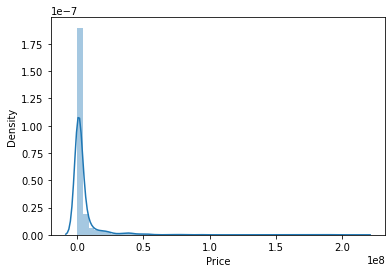

In [482]:
sns.distplot(df["Price"]);